<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/Assignment_1/DLWorkspaceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the libraries

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
from keras.preprocessing.image import ImageDataGenerator

In [0]:
np.random.seed(1) #Fix the random number generated

### Load the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Shape of the dataset

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Check for Null values

In [0]:
np.isnan(x_train).any()

False

## Augmentation

In [0]:
# datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen = ImageDataGenerator()
datagen.fit(x_train[None])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1, 60000, 28, 28) (28 channels).
  ' channels).')


## Normalize the input

In [0]:
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

## Split the validation Dataset

In [0]:
# x_train, x_validation = x_train[:-10000], x_train[-10000:]
# y_train, y_val = y_train[:-10000], y_train[-10000:]

In [0]:
x_train[0].shape

(28, 28)

In [0]:
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])

In [0]:
x_train[0].shape

(784,)

## Develop a FeedForwardNN

Initialize model paramters - weights and biases, number of inputs: 784,outputs: 10, 5 hidden layers. 
Activation functions used are sigmoid and Relu for hidden layers, Softmax for the output layer.

In [0]:
class SimpleFeedForwarddNN:
  def __init__(self, input, output):
    self.input = input
    self.output = output
    hiddenLayerNeuronsLayer1 = 2500
    hiddenLayerNeuronsLayer2 = 2000
    hiddenLayerNeuronsLayer3 = 1500
    hiddenLayerNeuronsLayer4 = 1000
    hiddenLayerNeuronsLayer5 = 500
    self.learningRate = 1 #initial learning rate
    numberInputNeurons = 784 #x_train[0].shape : 28*28
    numberOutputNeurons = 10
    self.dropoutVal = 0.1
    self.weight1 = 0.2 * np.random.randn(numberInputNeurons, hiddenLayerNeuronsLayer1) - 0.1
    self.bias1 = np.zeros((1, hiddenLayerNeuronsLayer1))
    self.weight2 = 0.2 * np.random.randn(hiddenLayerNeuronsLayer1, hiddenLayerNeuronsLayer2) - 0.1
    self.bias2 = np.zeros((1, hiddenLayerNeuronsLayer2)) # till this
    self.weight3 = 0.2 * np.random.randn(hiddenLayerNeuronsLayer2, hiddenLayerNeuronsLayer3) - 0.1
    self.bias3 = np.zeros((1, hiddenLayerNeuronsLayer3))
    self.weight4 = 0.2 * np.random.randn(hiddenLayerNeuronsLayer3, hiddenLayerNeuronsLayer4) - 0.1
    self.bias4 = np.zeros((1, hiddenLayerNeuronsLayer4))
    self.weight5 = 0.2 * np.random.randn(hiddenLayerNeuronsLayer4, hiddenLayerNeuronsLayer5) - 0.1
    self.bias5 = np.zeros((1, hiddenLayerNeuronsLayer5))
    self.weight6 = 0.2 * np.random.randn(hiddenLayerNeuronsLayer5, numberOutputNeurons) - 0.1
    self.bias6 = np.zeros((1, numberOutputNeurons))

  def sigmoid(self, val):
    s = 1/(1 + np.exp(-val))
    return s

  def relu(self, val):
    r = np.maximum(0,val)
    return r

  def softmax(self, val):
    exps = np.exp(val - np.max(val, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True) 

  # def dropout(self):
  #   keep = 1 - self.dropoutVal
  #   D1 = np.random.rand(self.a1.shape[0], self.a1.shape[1])
  #   #print(D1)
  #   D1 = D1 < keep
  #   self.a1 = np.multiply(self.a1, D1) 
  #   self.a1 = self.a1/keep

  def network(self):
    z1 = np.dot(self.input, self.weight1) + self.bias1
    self.a1 = self.sigmoid(z1)
    #self.dropout()
    z2 = np.dot(self.a1, self.weight2) + self.bias2
    self.a2 = self.relu(z2)    
    z3 = np.dot(self.a2, self.weight3) + self.bias3
    self.a3 = self.relu(z3)
    z4 = np.dot(self.a3, self.weight4) + self.bias4
    self.a4 = self.relu(z4)
    z5 = np.dot(self.a4, self.weight5) + self.bias5
    self.a5 = self.relu(z5)
    z6 = np.dot(self.a5, self.weight6) + self.bias6
    self.a6 = self.softmax(z6)

  def predict(self, x):
    self.input = x
    self.network()
    return self.a6.argmax()
  
  def updateLearningRate():
    self.learningRate *= 0.1

In [0]:
def iterate_minibatches(inputs, outputs, batchsize, shuffle=False):
    assert len(inputs) == len(outputs)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], outputs[excerpt]

To predict the accuracy of the model on train and test datasets.

In [0]:
def accuracy(x, y):
    model = SimpleFeedForwarddNN(x, y)
    acc = 0
    for xx,yy in zip(x, y):
        pred = model.predict(xx)
        if pred == np.argmax(yy):
            acc +=1
    return acc/len(x)*100

Train log and test log to store the train and test accuracies after each iteration for plotting.

Epoch 1 , Train_acc 99.06666666666666, Test_acc 98.66
Epoch 2 , Train_acc 98.62333333333333, Test_acc 99.21


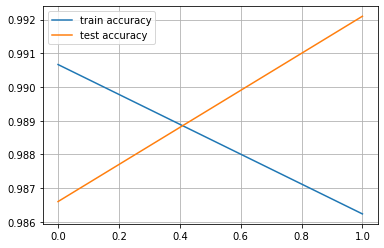

In [0]:
#model = SimpleFeedForwarddNN(x_train, y_train)
epochs = 3
train_log = []
test_log = []
for e in range(1, epochs):
  for x_batch,y_batch in iterate_minibatches(x_train, y_train, batchsize=64, shuffle=True):
      model = SimpleFeedForwarddNN(x_batch, y_batch)
      model.network() #train the model
  train_acc = accuracy(x_train, y_train)
  #train_acc = accuracy(x_batch, y_batch)
  test_acc = accuracy(x_test, y_test)
  print("Epoch %s , Train_acc %s, Test_acc %s" % (e, train_acc , test_acc)) #calculate the accuracies
  train_log.append(np.mean(train_acc/100))
  test_log.append(np.mean(test_acc/100))
  #model.updateLearningRate()

plt.plot(train_log,label='train accuracy')
plt.plot(test_log,label='test accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

With dropout in the first hidden layer, the train and test accuracies are:

* Epoch 1 , Train_acc 97.45833333333334, Test_acc 98.79 
* Epoch 2 , Train_acc 98.81, Test_acc 98.67

So, Commenting out the drop out code.
